### Hypothesis Tests 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

##### Normal Distribution

In [2]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 1000)
distribution = stats.norm.pdf(x)

Text(0.5, 1.0, 'A Normal Distribution')

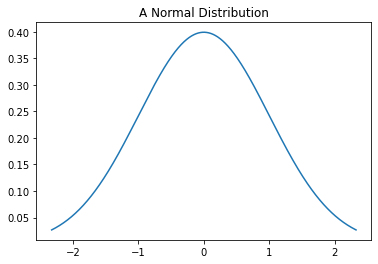

In [3]:
plt.plot(x, distribution)
plt.title('A Normal Distribution')

In [4]:
df = pd.DataFrame({'heights': distribution}, index=x)

In [5]:
df

,heights
-2.326348,0.026652
-2.321691,0.026942
-2.317033,0.027235
-2.312376,0.027530
-2.307718,0.027828
...,...
2.307718,0.027828
2.312376,0.027530
2.317033,0.027235
2.321691,0.026942


In [6]:
#coin example
##one coin flip
np.random.binomial(1, 0.5)

0

In [11]:
np.random.binomial(1000, 0.5)/1000

0.499

In [12]:
distribution_of_flips = np.random.binomial(100, 0.5, 1000)

In [14]:
import seaborn as sns

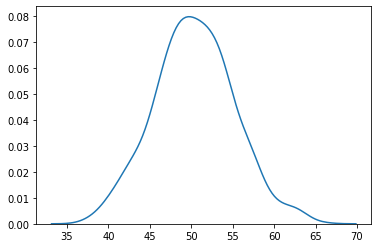

In [15]:
sns.distplot(distribution_of_flips, hist=False)

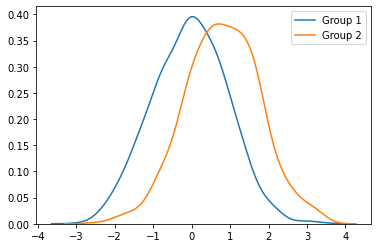

In [16]:
#gaussian
sns.distplot(np.random.normal(size = 1000), hist = False, label = 'Group 1')
sns.distplot(np.random.normal(loc = 0.75, size = 1000), hist = False, label = 'Group 2')

#### Hypothesis Tests

- What's the distribution that I'm imagining -- here it's a normal with mean 0.  
- p-value: 0.001

In [18]:
df['heights'].mean()

0.21044655257960368

In [17]:
#1-sample t-test
#test if mean is likely equal to some value
stats.ttest_1samp(df['heights'], 0)

Ttest_1sampResult(statistic=52.22422013642443, pvalue=7.858255959734121e-288)

In [20]:
g1 = np.random.normal(size = 1000)
g2 = np.random.normal(loc = 0.75, size = 1000)

In [21]:
stats.ttest_ind(g1, g2)

Ttest_indResult(statistic=-15.76242030251274, pvalue=7.5311472115746715e-53)

In [28]:
def p_value_experiment(location, sample):
    np.random.seed(24)
    g1 = np.random.normal(size = sample)
    g2 = np.random.normal(loc = location, size = sample)
    tstat, pval = stats.ttest_ind(g1, g2)
    sns.distplot(g1, hist = False, label = 'Group 1')
    sns.distplot(g2, hist = False, label = 'Group 2')
    plt.title(f'The p-value is {pval: .10f}')

In [29]:
from ipywidgets import interact
import ipywidgets as widgets

In [31]:
interact(p_value_experiment, location = widgets.FloatSlider(min = -2, max = 2, step = 0.05),
        sample = widgets.IntSlider(min = 10, max = 100_000, step = 10))

interactive(children=(FloatSlider(value=0.0, description='location', max=2.0, min=-2.0, step=0.05), IntSlider(…

<function __main__.p_value_experiment(location, sample)>

In [32]:
#if not independent?
stats.ttest_rel(g1, g2)

Ttest_relResult(statistic=-15.639051023370609, pvalue=1.7655049930810358e-49)

In [33]:
stats.ttest_1samp(g1 - g2, 0)

Ttest_1sampResult(statistic=-15.639051023370609, pvalue=1.7655049930810358e-49)

In [34]:
titanic = sns.load_dataset('titanic')

In [35]:
tips = sns.load_dataset('tips')

In [36]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
survived = titanic.loc[titanic['survived'] == 1]['fare'].dropna()
died = titanic.loc[titanic['survived'] == 0]['fare'].dropna()

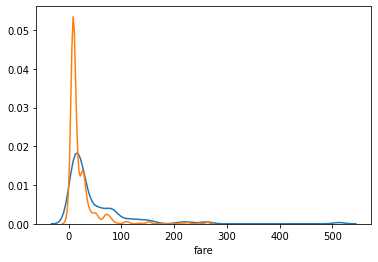

In [47]:
sns.distplot(survived, hist = False)
sns.distplot(died, hist = False)

In [48]:
survived.mean()

48.39540760233917

In [49]:
died.mean()

22.117886885245877

In [50]:
stats.ttest_ind(survived, died)

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

In [51]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [57]:
smoker = tips.loc[tips['time'] == 'Dinner']['tip']
nonsmoker = tips.loc[tips['time'] != 'Dinner']['tip']

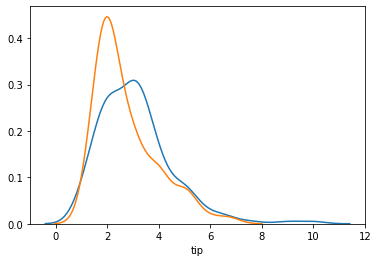

In [58]:
sns.distplot(smoker, hist = False)
sns.distplot(nonsmoker, hist = False)

In [59]:
stats.ttest_ind(smoker, nonsmoker)

Ttest_indResult(statistic=1.9062569301202392, pvalue=0.05780153475171558)

In [ ]:
df1 = pd.DataFrame({'height': g1, 'label': ['g1' for g in g1]})
df2 = pd.DataFrame({'height': g2, 'label': ['g2' for g in g2]})

In [ ]:
df = df1.append(df2)

In [ ]:
df.head()

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
model = ols('height ~ label', df).fit()

In [ ]:
print(model.summary())

In [ ]:
stats.ttest_ind(g1, g2)